In [1]:
import torch
from torchvision import datasets, transforms
from utils import data_transformation, plot_dataset,plot_train
from model import Net
!pip install torchsummary
from torchsummary import summary
import torch.optim as optim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#setting devide to Cuda
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")
device

CUDA Available? True


device(type='cuda')

In [3]:
# Configuration for data transformations
transformation_config ={
    'train_config':[
      transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
      transforms.Resize((28, 28)),
      transforms.RandomRotation((-15., 15.), fill=0),
      transforms.ToTensor(),
      transforms.Normalize((0.1307,), (0.3081,)),
      ],
    'test_config':[
      transforms.ToTensor(),
      transforms.Normalize((0.1307,), (0.3081,))
      ]
}

In [4]:
# Applying data transformations
train_transforms, test_transforms = data_transformation(transformation_config)

In [5]:
# Loading MNIST dataset with the specified transformations
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 1024
# Setting up data loaders

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

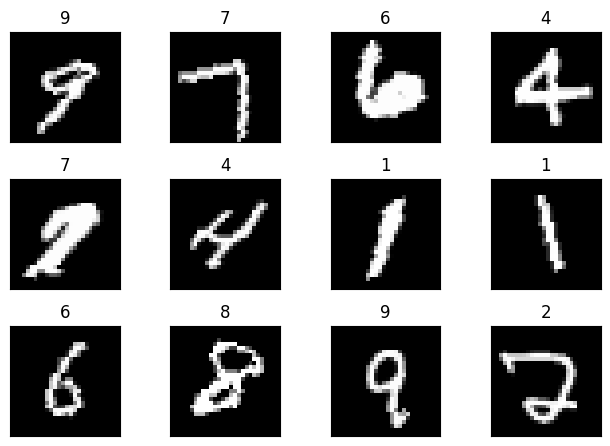

In [7]:
# Plotting a sample of the dataset
plot_dataset(train_loader)

In [8]:
# Creating an instance of the neural network model
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


In [9]:
# Data to plot accuracy and loss graphs
# test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [10]:
# Creating an optimizer and a learning rate scheduler
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

# Creating an optimizer and a learning rate scheduler
train_acc,train_losses,test_acc,test_losses = model.run(num_epochs,model,device,train_loader,test_loader,optimizer, scheduler)



Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.2842 Batch_id=58 Accuracy=37.55: 100%|██████████| 59/59 [00:31<00:00,  1.89it/s]


Test set: Average loss: 2.2813, Accuracy: 2611/10000 (26.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.0658 Batch_id=58 Accuracy=41.49: 100%|██████████| 59/59 [00:22<00:00,  2.58it/s]


Test set: Average loss: 0.8846, Accuracy: 7476/10000 (74.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.2855 Batch_id=58 Accuracy=87.09: 100%|██████████| 59/59 [00:22<00:00,  2.57it/s]


Test set: Average loss: 0.1658, Accuracy: 9517/10000 (95.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1699 Batch_id=58 Accuracy=94.18: 100%|██████████| 59/59 [00:22<00:00,  2.57it/s]


Test set: Average loss: 0.1056, Accuracy: 9668/10000 (96.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1244 Batch_id=58 Accuracy=95.57: 100%|██████████| 59/59 [00:24<00:00,  2.43it/s]


Test set: Average loss: 0.0772, Accuracy: 9762/10000 (97.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1238 Batch_id=58 Accuracy=96.30: 100%|██████████| 59/59 [00:22<00:00,  2.59it/s]


Test set: Average loss: 0.0616, Accuracy: 9808/10000 (98.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0807 Batch_id=58 Accuracy=96.84: 100%|██████████| 59/59 [00:22<00:00,  2.58it/s]


Test set: Average loss: 0.0534, Accuracy: 9831/10000 (98.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0829 Batch_id=58 Accuracy=97.21: 100%|██████████| 59/59 [00:22<00:00,  2.59it/s]


Test set: Average loss: 0.0521, Accuracy: 9840/10000 (98.40%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0762 Batch_id=58 Accuracy=97.47: 100%|██████████| 59/59 [00:22<00:00,  2.58it/s]


Test set: Average loss: 0.0432, Accuracy: 9867/10000 (98.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0484 Batch_id=58 Accuracy=97.70: 100%|██████████| 59/59 [00:23<00:00,  2.53it/s]


Test set: Average loss: 0.0513, Accuracy: 9833/10000 (98.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0737 Batch_id=58 Accuracy=97.77: 100%|██████████| 59/59 [00:23<00:00,  2.53it/s]


Test set: Average loss: 0.0385, Accuracy: 9873/10000 (98.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0817 Batch_id=58 Accuracy=97.94: 100%|██████████| 59/59 [00:23<00:00,  2.52it/s]


Test set: Average loss: 0.0362, Accuracy: 9884/10000 (98.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0494 Batch_id=58 Accuracy=98.04: 100%|██████████| 59/59 [00:22<00:00,  2.60it/s]


Test set: Average loss: 0.0353, Accuracy: 9884/10000 (98.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0709 Batch_id=58 Accuracy=98.15: 100%|██████████| 59/59 [00:22<00:00,  2.58it/s]


Test set: Average loss: 0.0346, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0374 Batch_id=58 Accuracy=98.31: 100%|██████████| 59/59 [00:23<00:00,  2.51it/s]


Test set: Average loss: 0.0338, Accuracy: 9897/10000 (98.97%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0448 Batch_id=58 Accuracy=98.53: 100%|██████████| 59/59 [00:23<00:00,  2.51it/s]


Test set: Average loss: 0.0295, Accuracy: 9904/10000 (99.04%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0457 Batch_id=58 Accuracy=98.48: 100%|██████████| 59/59 [00:23<00:00,  2.50it/s]


Test set: Average loss: 0.0290, Accuracy: 9907/10000 (99.07%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0525 Batch_id=58 Accuracy=98.56: 100%|██████████| 59/59 [00:23<00:00,  2.48it/s]


Test set: Average loss: 0.0294, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0419 Batch_id=58 Accuracy=98.54: 100%|██████████| 59/59 [00:23<00:00,  2.52it/s]


Test set: Average loss: 0.0289, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0468 Batch_id=58 Accuracy=98.53: 100%|██████████| 59/59 [00:23<00:00,  2.47it/s]


Test set: Average loss: 0.0281, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-03.


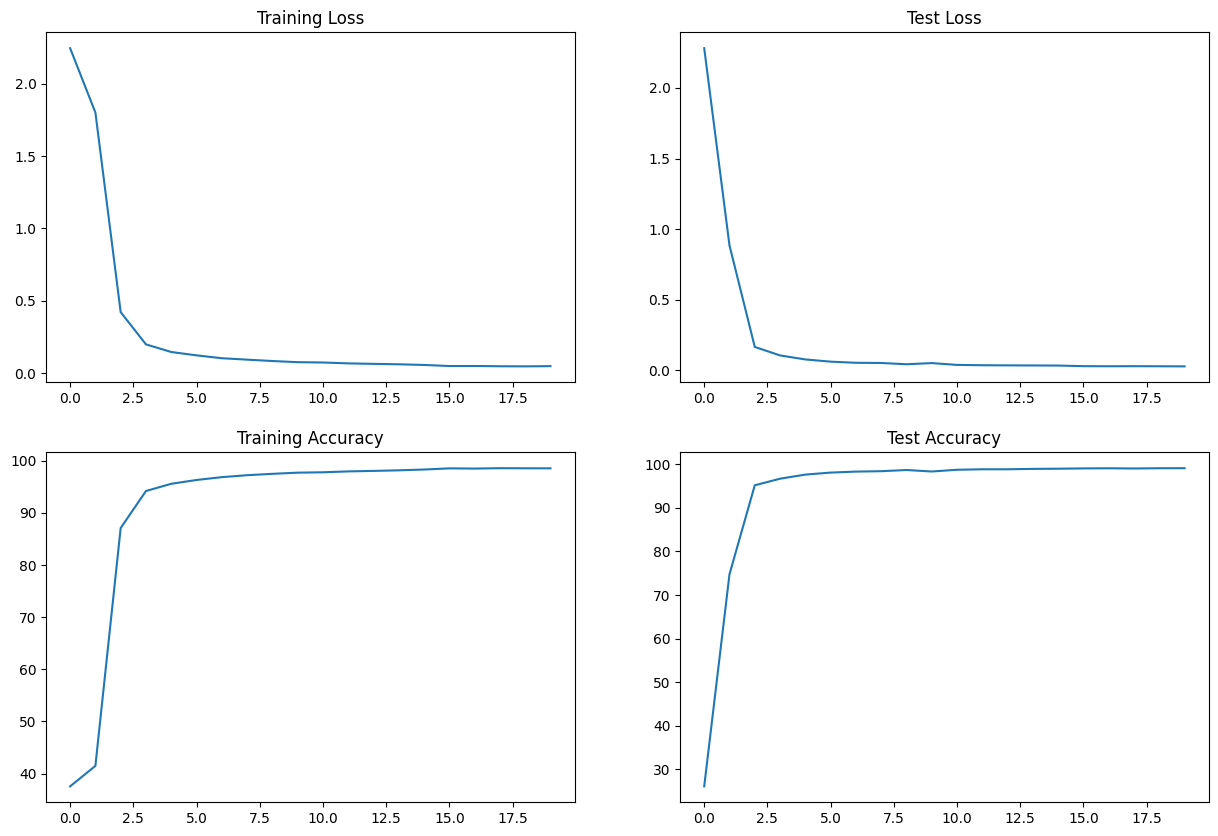

In [11]:
# Creating an optimizer and a learning rate scheduler
plot_train(train_acc,train_losses,test_acc,test_losses)